In [2]:
# install
!pip install pytesseract opencv-python matplotlib

In [3]:
# import libraries
import cv2  #designed for computer vision and image processing
import pytesseract  #used for extracting text from images
import matplotlib.pyplot as plt  #create plots and display images

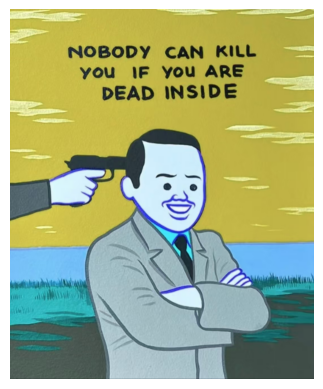

In [4]:
# read the image
image_path = 'picture-1.jpg'  # relative path
image = cv2.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

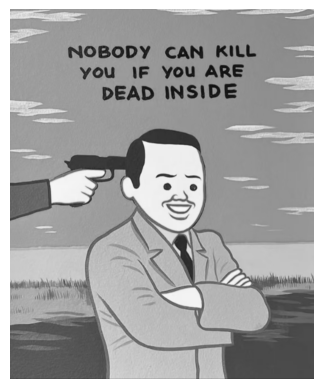

In [5]:
# image preprocessing
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #convert the image to grayscale
image_rgb = cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [6]:
# binarization
_, binary_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

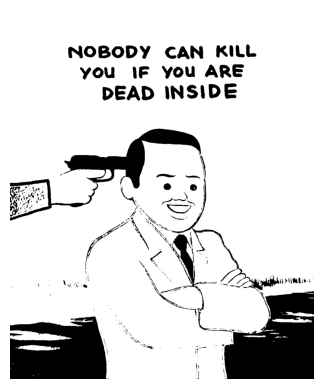

In [7]:
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
# edge detection 
edged = cv2.Canny(binary_image, 75, 200)

In [9]:
# threshold processing
thresh = cv2.adaptiveThreshold(edged, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2) 

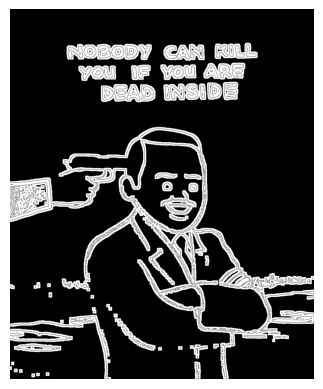

In [10]:
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))  
plt.axis('off')  
plt.show()

In [11]:
import pytesseract
# set the path of Tesseract
pytesseract.pytesseract.tesseract_cmd = r'D:\tesseract\tesseract.exe' 
print(pytesseract.get_tesseract_version())

5.4.0.20240606


In [12]:
# getting boxes around text
img = cv2.imread('picture-1.jpg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

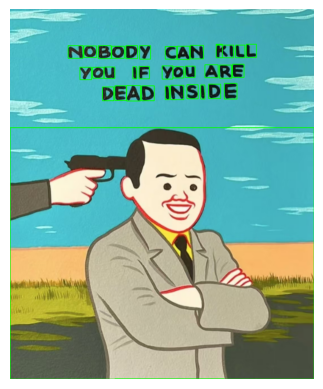

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
plt.axis('off')  
plt.show()

In [14]:
# recognize text and output the results
recognized_text = pytesseract.image_to_string(img)
print(recognized_text)

NOBODY CAN KILL
you IF you ARE
DEAD INSIDE




In [15]:
import time

start_time = time.time()
recognized_text = pytesseract.image_to_string(thresh)
end_time = time.time()

print(f"Processing Time: {end_time - start_time} seconds")

Processing Time: 0.2838404178619385 seconds
